<a href="https://colab.research.google.com/github/Surichn/DSAI/blob/main/DS/TA/NLP/NLP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word Embeddings for Sentiment Analysis

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.8.0


Download imdb_review dataset

In [2]:
data,info = tds.load("imdb_reviews", with_info= True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8U0MHK/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8U0MHK/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8U0MHK/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Train and Test Datasets

In [3]:
train_data, test_data = data['train'], data['test']

# Create empty lists
train_sentences =[]
test_sentences = []

train_labels =[]
test_labels = []

In [4]:
# Extract Sentences and Labels

for sent, label in train_data:
  train_sentences.append(str(sent.numpy().decode('utf8')))
  train_labels.append(label.numpy())

for sent, label in test_data:
  test_sentences.append(str(sent.numpy().decode('utf8')))
  test_labels.append(label.numpy())

In [5]:
# Convering label list to arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

Data Preparation

In [14]:
# Define parameters
vocab_size = 5000
embedding_dim = 16
max_length = 150
trunc_type = 'post'
padding_type = 'post'
oov_tok="<oov>"

In [7]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Training Sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_pad = pad_sequences(train_seqs, maxlen=max_length,truncating=trunc_type)

# Testing Sequences and lables
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seqs, maxlen=max_length)

Define the Neural network with Embedding layer

*   Use the Sequential API
*   Add an embedding input layer of input size equal to vocabulary size
*   Add a flattern layer and 2 dense layers

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           80000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 80,109
Trainable params: 80,109
Non-trainable params: 0
_________________________________________________________________


Model Training

In [11]:
num_epochs = 10

history = model.fit(
    train_pad,
    train_labels,
    epochs = num_epochs,
    validation_data = (test_pad, test_labels)
)

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2129 - accuracy: 0.9160 - val_loss: 0.3822 - val_accuracy: 0.8492
Epoch 2/10
782/782 [==============================] - 3s 3ms/step - loss: 0.2084 - accuracy: 0.9175 - val_loss: 0.3905 - val_accuracy: 0.8479
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 0.2061 - accuracy: 0.9180 - val_loss: 0.4093 - val_accuracy: 0.8433
Epoch 4/10
782/782 [==============================] - 3s 3ms/step - loss: 0.2028 - accuracy: 0.9224 - val_loss: 0.4203 - val_accuracy: 0.8418
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2000 - accuracy: 0.9212 - val_loss: 0.4156 - val_accuracy: 0.8419
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1975 - accuracy: 0.9242 - val_loss: 0.4335 - val_accuracy: 0.8390
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.1955 - accuracy: 0.9241 - val_loss: 0.4346 - val_accuracy: 0.8390
Epoch 

Visualize Train and Validation accuracy and loss

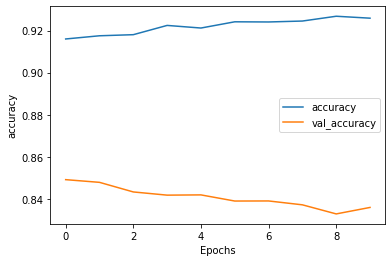

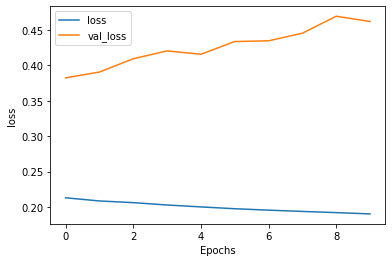

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' +string])
  plt.legend([string, 'val_' +string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

Classify new reviews

In [15]:
sentence = ["The first part of the movie was dull and boring", "We watched Queen's Gambit, all seven hours of it, in a single sitting"]

sequences = tokenizer.texts_to_sequences(sentence)
pad_seq = pad_sequences(sequences, maxlen=max_length,padding=padding_type, truncating=trunc_type)

print(model.predict(pad_seq))

[[0.02789387]
 [0.28595012]]
